## Homework Linear Regression

- The dataset you are working is Boston Housing Price

- The Boston_Housing_Prices dataset is a famous dataset usually used for learning or benchmarking regression techniques. This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as the target. 

- For this assignment, your task is to:

1- Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets) 

2- Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff! 

3- Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)

4- Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part.

Hint: `from sklearn.model_selection import train_test_split`

Hint: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)`

5 -Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.

6- Compute, Mean-Square-Error (MSE) and R Squared score of your Model 

Hint: `from sklearn.metrics import r2_score`

Hint: `from sklearn.metrics import mean_squared_error`

In [6]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

print(boston.data)

#13 columns and 506 rows
print(boston.data.shape)

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

print(bos.head())

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2 

In [24]:
#basic exploratory data analysis
import numpy as np

prices = bos['PRICE']

crim = bos['CRIM']

b = bos['B']

average_crim = round(np.mean(crim),2)
lowest_crim = np.amin(crim)
highest_crim = np.amax(crim)

average_b = round(np.mean(b),2)
lowest_b = np.amin(b)
highest_b = np.amax(b)

average_price = round(np.mean(prices),2)
lowest_price = np.amin(prices)
highest_price = np.amax(prices)


print("Data stats:\n")

print("Average crime rate is {}.".format(average_crim))
print("Lowest crime rate is {}.".format(lowest_crim))
print("Highest crime rate is {}.\n".format(highest_crim))

print("Average proportion of African Americans is {}.".format(average_b))
print("Lowest proportion of African Americans {}.".format(lowest_b))
print("Highest proportion of African Americans {}.\n".format(highest_b))

print("Average house median value is ${}K.".format(average_price))
print("Lowest house median value is ${}K.".format(lowest_price))
print("Highest house median value is ${}K.".format(highest_price))

Data stats:

Average crime rate is 3.61.
Lowest crime rate is 0.00632.
Highest crime rate is 88.9762.

Average proportion of African Americans is 356.67.
Lowest proportion of African Americans 0.32.
Highest proportion of African Americans 396.9%.

Average house median value is $22.53K.
Lowest house median value is $5.0K.
Highest house median value is $50.0K.


<AxesSubplot:xlabel='ZN', ylabel='INDUS'>

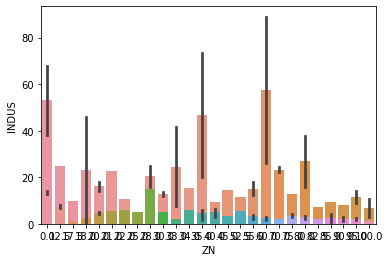

In [46]:
# #graphs
import seaborn as sns

#house median value vs. crime rate
sns.barplot(x="PRICE", y="CRIM", data=bos)

<AxesSubplot:xlabel='ZN', ylabel='INDUS'>

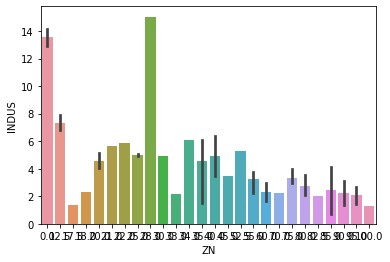

In [59]:
#residential land vs. non-retail business land
sns.barplot(x="ZN", y="INDUS", data=bos)

<AxesSubplot:>

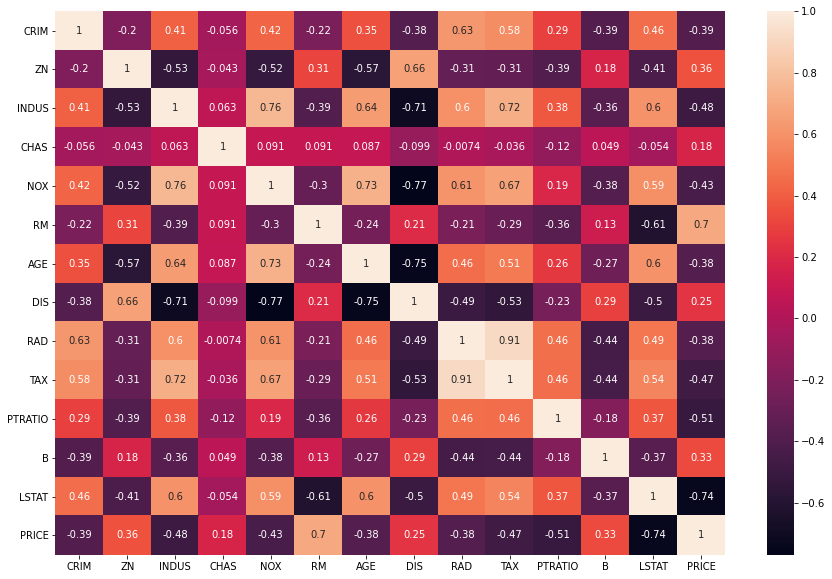

In [65]:
#heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(bos.corr(),annot=True)

In [93]:
#training the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


feature_cols = ["PRICE","CRIM"]
x_train, x_test, y_train, y_test = train_test_split(bos, bos[feature_cols], test_size=0.25, random_state=0)

lm =LinearRegression()
lm.fit(x_train, y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

y_pred = lm.predict(x_test)

print(y_pred)

print('r2 score is {}.'.format(r2_score(y_test, y_pred)))
print('Mean Squared Error is {}.'.format(mean_squared_error(y_test, y_pred)))

[ 2.30926389e-13 -1.68753900e-14]
[[-2.65425074e-16  1.38777878e-17  6.98226199e-17 -1.05620172e-14
   1.31552585e-14  2.09591865e-15 -3.86843335e-16 -9.33281230e-16
   2.98372438e-16  0.00000000e+00  1.56748529e-16 -6.83481050e-16
  -3.90529623e-16  1.00000000e+00]
 [ 1.00000000e+00 -1.11031902e-16 -3.26585016e-16  1.90180453e-16
   2.37664788e-15  4.52710363e-16 -8.40477782e-17 -6.83471417e-16
   3.59375583e-16 -4.42908007e-17  4.17123444e-17  1.04313415e-16
   2.01932401e-16 -2.29398709e-16]]
[[2.26000e+01 6.72400e-02]
 [5.00000e+01 9.23230e+00]
 [2.30000e+01 1.14250e-01]
 [8.30000e+00 2.48017e+01]
 [2.12000e+01 5.64600e-02]
 [1.99000e+01 6.27390e-01]
 [2.06000e+01 4.83567e+00]
 [1.87000e+01 6.15100e-02]
 [1.61000e+01 2.63548e+00]
 [1.86000e+01 2.28760e-01]
 [8.80000e+00 7.35341e+01]
 [1.72000e+01 1.40507e+01]
 [1.49000e+01 6.28807e+00]
 [1.05000e+01 2.43938e+01]
 [5.00000e+01 1.83377e+00]
 [2.90000e+01 5.56100e-02]
 [2.30000e+01 5.82401e+00]
 [3.33000e+01 4.01100e-02]
 [2.94000e+01

## Apply data normalization (Scaling) to improve the prediction result

- Use StandardScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

- Use MinMaxScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

- Watch this video: https://www.youtube.com/watch?v=YKP31T5LIXQ

In [92]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max = MinMaxScaler()
boston_min_max = min_max.fit_transform(bos)

feature_cols = ["PRICE","CRIM"]
mm_x_train, mm_x_test, mm_y_train, mm_y_test = train_test_split(boston_min_max, bos[feature_cols], test_size=0.25, random_state=0)

mm_lm = LinearRegression()
mm_lm.fit(mm_x_train, mm_y_train)

# print intercept and coefficients
print(mm_lm.intercept_)
print(mm_lm.coef_)

mm_y_pred = mm_lm.predict(mm_x_test)

print(mm_y_pred)

print('r2 score is {}.'.format(r2_score(mm_y_test, mm_y_pred)))
print('Mean Squared Error is {}.'.format(mean_squared_error(mm_y_test, mm_y_pred)))

[5.      0.00632]
[[ 3.62273004e-14 -4.61852778e-14 -7.54951657e-15 -7.16093851e-15
  -3.59712260e-14  2.94209102e-14 -5.32907052e-15  1.66533454e-14
  -2.66453526e-15  5.32907052e-15  5.21804822e-14  8.30446822e-14
  -5.77315973e-15  4.50000000e+01]
 [ 8.89698800e+01  3.12180384e-15  9.09330526e-15 -2.25750230e-15
  -5.01697311e-15 -8.84652493e-15 -2.87609871e-15  2.52584194e-15
  -2.00346253e-14  8.29077038e-15 -4.24832545e-15 -1.62022133e-14
  -1.06954750e-15  1.90227581e-14]]
[[2.26000e+01 6.72400e-02]
 [5.00000e+01 9.23230e+00]
 [2.30000e+01 1.14250e-01]
 [8.30000e+00 2.48017e+01]
 [2.12000e+01 5.64600e-02]
 [1.99000e+01 6.27390e-01]
 [2.06000e+01 4.83567e+00]
 [1.87000e+01 6.15100e-02]
 [1.61000e+01 2.63548e+00]
 [1.86000e+01 2.28760e-01]
 [8.80000e+00 7.35341e+01]
 [1.72000e+01 1.40507e+01]
 [1.49000e+01 6.28807e+00]
 [1.05000e+01 2.43938e+01]
 [5.00000e+01 1.83377e+00]
 [2.90000e+01 5.56100e-02]
 [2.30000e+01 5.82401e+00]
 [3.33000e+01 4.01100e-02]
 [2.94000e+01 6.66400e-02]
 [

In [94]:
std= StandardScaler()
boston_std = std.fit_transform(bos)

feature_cols = ["PRICE","CRIM"]
s_x_train, s_x_test, s_y_train, s_y_test = train_test_split(boston_std, bos[feature_cols], test_size=0.25, random_state=0)

s_lm = LinearRegression()
s_lm.fit(s_x_train, s_y_train)

# print intercept and coefficients
print(s_lm.intercept_)
print(s_lm.coef_)

s_y_pred = s_lm.predict(s_x_test)

print(s_y_pred)

print('r2 score is {}.'.format(r2_score(s_y_test, s_y_pred)))
print('Mean Squared Error is {}.'.format(mean_squared_error(s_y_test, s_y_pred)))

[22.53280632  3.61352356]
[[ 4.85598323e-15 -3.99680289e-15  2.10942375e-15 -3.52495810e-15
   5.21804822e-15 -1.33226763e-15 -1.44328993e-15 -5.32907052e-15
  -2.22044605e-16  4.44089210e-15  4.38538095e-15 -6.10622664e-15
   2.22044605e-16  9.18801155e+00]
 [ 8.59304135e+00  4.60628606e-15  8.07674750e-16  6.53720304e-16
  -2.78624247e-16  1.66279937e-15 -1.81402427e-15  4.90110187e-16
   1.86438636e-15  2.42179938e-15 -1.96874051e-15  6.10695592e-16
  -1.29156546e-15  7.03983472e-16]]
[[2.26000e+01 6.72400e-02]
 [5.00000e+01 9.23230e+00]
 [2.30000e+01 1.14250e-01]
 [8.30000e+00 2.48017e+01]
 [2.12000e+01 5.64600e-02]
 [1.99000e+01 6.27390e-01]
 [2.06000e+01 4.83567e+00]
 [1.87000e+01 6.15100e-02]
 [1.61000e+01 2.63548e+00]
 [1.86000e+01 2.28760e-01]
 [8.80000e+00 7.35341e+01]
 [1.72000e+01 1.40507e+01]
 [1.49000e+01 6.28807e+00]
 [1.05000e+01 2.43938e+01]
 [5.00000e+01 1.83377e+00]
 [2.90000e+01 5.56100e-02]
 [2.30000e+01 5.82401e+00]
 [3.33000e+01 4.01100e-02]
 [2.94000e+01 6.66400